# HW 1 Start

This Jupyter notebook has code to get you started with Homework 1. Feel free to use anything in this notebook (cut-and-paste) in your own notebook containing your solutions.

You might also take a look at the [Math Notation Guide](https://tomfletcher.github.io/DSP/examples/MathNotationGuide.ipynb) for help with typing mathematics into your Jupyter notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from IPython.display import Audio

## Signals as Numpy Arrays
We can represent a finite-length signal as a `numpy` array. For simple signals, we can just enter the values of the signal in manually like so:

In [2]:
x = np.array([0,1,2,3,4,3,2,1,0])

In [3]:
print(x)

[0 1 2 3 4 3 2 1 0]


To get the length of a signal, we can use:

In [4]:
N = x.size
print(N)

9


Individual signal values are accessed by indexing:

In [5]:
print(x[0])
print(x[3])
print(x[7])

0
3
1


Note that indexing can also be negative. Negative indices are counted from the last value in the array, `n = -1`, to the first value in the array, `n = -N`.

In [6]:
print(x[-2])
print(x[-6])

1
3


## Basic Signal Arithmetic

Basic signal arithmetic can be done using simple `numpy` functions (and often avoiding `for` loops over your array). Note these arithmetic operations (multiplication, adding) of a scalar are applied to each element in the array.

In [7]:
print("x =", x)
print("2x =", 2 * x)
print("x + 3 =", x + 3)
print("x / 2.0 =", x / 2.0)

x = [0 1 2 3 4 3 2 1 0]
2x = [0 2 4 6 8 6 4 2 0]
x + 3 = [3 4 5 6 7 6 5 4 3]
x / 2.0 = [0.  0.5 1.  1.5 2.  1.5 1.  0.5 0. ]


We can also do simple arithmetic involving two (or more) signals. Again, notice how the operations are applied to each of the elements in the arrays.

In [8]:
y = np.arange(9)
print("x =", x)
print("y =", y)
print("x + y =", x + y)
print("x * y =", x * y)
print("2x - 3y =", 2 * x - 3 * y)

x = [0 1 2 3 4 3 2 1 0]
y = [0 1 2 3 4 5 6 7 8]
x + y = [0 2 4 6 8 8 8 8 8]
x * y = [ 0  1  4  9 16 15 12  7  0]
2x - 3y = [  0  -1  -2  -3  -4  -9 -14 -19 -24]


## Plotting Signals

Here are some ways to plot a signal using `matplotlib`. First, we'll use the default `plot` function. It uses lines by default, which is sometimes good for what we want to do, but doesn't show the discrete points.

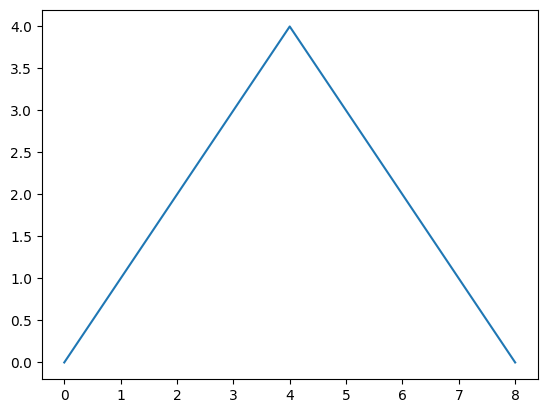

In [9]:
plt.plot(x)
plt.show()

For simple signals, we often would like to see each discrete point better. The `stem` function does this for us. It's also always a good idea to label your x and y axes!

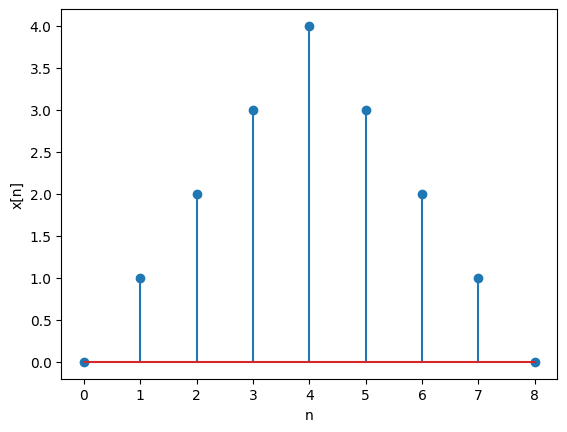

In [10]:
plt.stem(x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

## Signals as Functions

Here we will build a signal as a function of discrete inputs. `numpy` has a lot of built in functions like `cos`, `sin`, `exp`. These functions can take an entire `numpy` array as input, and evaluate the function on each element of the input array.

First let's create a finite array of inputs:

In [11]:
n = np.arange(0, 20)
print(n)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Here's an example of the cosine function, with a particular frequency and phase. Namely, our signal is the function:

$$x[n] = \cos \left( \frac{n \pi}{10} + \frac{\pi}{2} \right).$$

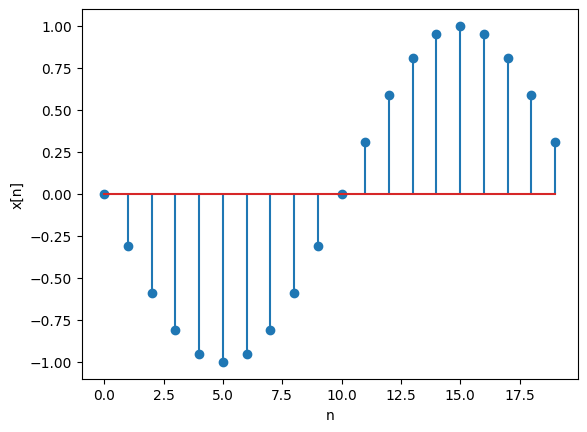

In [12]:
freq = 0.1 * np.pi
phase = np.pi / 2.0

x = np.cos(n * freq + phase)

plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

Here is just a trick to make a slightly nicer looking plot with a gray background and grid lines.

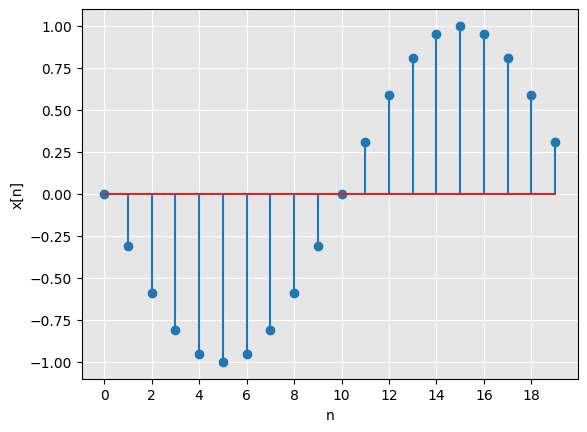

In [13]:
plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')

# Make plot background gray
ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))

# Add a white grid
plt.grid(color = 'white')

# Change tick marks on the x-axis so that they are integers
plt.xticks(np.arange(0, 10) * 2)

plt.show()

And here's an example of an exponential signal.

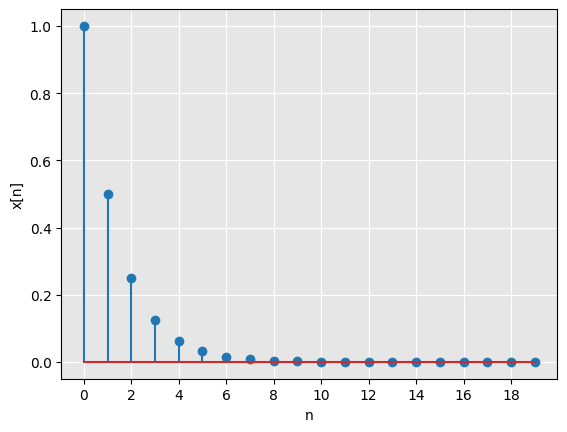

In [14]:
alpha = 0.5

x = np.power(alpha, n)

plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')
ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))
plt.grid(color = 'white')
plt.xticks(np.arange(0, 10) * 2)
plt.show()

One good trick is that the inputs to your signal (the `n`) does not have to start at zero. Here we'll go in the range $[-10, 9]$.

In [15]:
n = np.arange(-10, 10)
print(n)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


If you do this, you have to remember to pass `n` to the plot, as well as the signal, so that your horizontal axis ticks match the true `n` values. Like so:

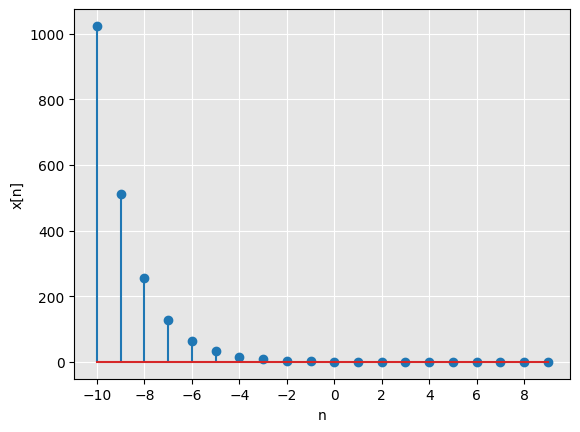

In [16]:
alpha = 0.5

x = np.power(alpha, n)

plt.stem(n, x)
plt.xlabel('n')
plt.ylabel('x[n]')
ax = plt.gca()
ax.set_facecolor((0.9,0.9,0.9))
plt.grid(color = 'white')
plt.xticks(np.arange(-5, 5) * 2)
plt.show()

## Getting Started with Audio Files
Here is a snippet of code to read in a WAV audio file

In [17]:
# This code reads in the wav file as a numpy array
woodchuck_file = wave.open("woodchuck.wav")
nframes = woodchuck_file.getnframes()
woodchuck_signal = np.frombuffer(woodchuck_file.readframes(nframes), dtype = np.int16)

# Converting the signal values to float for better numerical processing
woodchuck_signal = woodchuck_signal.astype(float)

# The frame rate, or sampling rate, in Hz
framerate = woodchuck_file.getframerate()

# Play the audio interactively in the notebook
woodchuck_audio = Audio(data = woodchuck_signal, rate = framerate)
woodchuck_audio